In [58]:
# Impor Function module 
from Berlin_Airbnb_Function import *

# Import all of the necessary packages
import pandas as pd # data processing
import math # calculation
import numpy as np #linear algebra
from collections import Counter 


# Data Visualization
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from pylab import *

### **Loading Data**

#### Loading the data which is in a csv file and loading it into a datafram for our analysis. 

Data was scraped on 09/16/2023
- There are two csv files with the Airbnb listings for Berlin. 
- I will be using the cleaned up csv files to do my analysis. 
- This file includes everything I need to analysis Berlin's Airbnb listings. 


In [59]:
# Load our csv file
berlin_df = pd.read_csv('/Users/kim/Desktop/repos/1. Linear Regression/Airbnb_Berlin/listings.csv')

# Check out what the dataframe looks like
berlin_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20230916061000,2023-09-16,city scrape,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.62,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.85
1,9991,https://www.airbnb.com/rooms/9991,20230916061000,2023-09-16,city scrape,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.08
2,14325,https://www.airbnb.com/rooms/14325,20230916061000,2023-09-16,city scrape,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.84,4.58,4.42,NaN,f,4,4,0,0,0.16
3,16644,https://www.airbnb.com/rooms/16644,20230916061000,2023-09-16,city scrape,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,Light and sunny 2-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/73759174/e2ef...,64696,...,4.86,4.67,4.71,NaN,f,2,2,0,0,0.30
4,17904,https://www.airbnb.com/rooms/17904,20230916061000,2023-09-16,city scrape,Rental unit in Berlin · ★4.77 · Studio · 1 bed...,"- apt is available starting April 1, 2023<br /...",NaN,https://a0.muscache.com/pictures/d9a6f8be-54b9...,68997,...,4.92,4.87,4.65,NaN,f,1,1,0,0,1.81


### **Understandanding and Cleaning the Data**

**Our dataframe consists of 13,134 entries with 75 columns.**
- We see that there are columns with null values, such as license. Because license is not crucial for our analysis and is missing significant values, we can remove it from our dataframe. 
- Our dataframe consists of columns that are different datatypes (float, int, object).

**In this section, we will be exploring our data and cleaning up our dataframe to get it ready for our analysis.**


1. Let's drop all of the columns we don 't need to bring down the size of our dataframe

In [60]:
# Create a list of columns to be dropped from the dataframe
columns_to_drop = ['listing_url','scrape_id','last_scraped','source','host_name','host_location','host_about','host_thumbnail_url',
                    'host_picture_url','host_neighbourhood','neighbourhood','bathrooms','minimum_minimum_nights','maximum_minimum_nights',
                    'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
                    'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','license','instant_bookable',
                    'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                    'name','description','neighborhood_overview','picture_url']   

# Call the drop_columns function
berlin_df = drop_columns(berlin_df, columns_to_drop)

2. Let's check how many null values we have in each column and if it is significant.


In [61]:
# Let print out the sum of null values per column 
null_values_sum(berlin_df)


id                                 0
host_id                            0
host_url                           0
host_since                         9
host_response_time              4869
host_response_rate              4869
host_acceptance_rate            4089
host_is_superhost                 83
host_listings_count                9
host_total_listings_count          9
host_verifications                 0
host_has_profile_pic               9
host_identity_verified             9
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     6
bedrooms                        4874
beds                             162
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
h

We see that the columns that has to do with reviews has ~2800 null values. This means that these listings are doesn't have any reviews yet. 
- We can replace these null values with 0 to indicate there hasn't been any reviews yet.


In [62]:
# Define the list of columns to fill null values
""" For this section, I am only coverting the null values from any columns that has 
    to do with reviews as we know that this will not affect how we analyze the data 
    later unlike converting categorical columns 
"""
columns_to_fill = ['review_scores_communication','review_scores_checkin','review_scores_rating','review_scores_accuracy',
                    'review_scores_cleanliness','reviews_per_month','review_scores_location','review_scores_value']

# Specify the value to fill null values
value_to_fill = 0  # The value that our

# Call the function to fill null values in the specified columns
fill_null_values(berlin_df, columns_to_fill, value_to_fill)


,id,host_id,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3176,3718,https://www.airbnb.com/users/show/3718,2008-10-19,NaN,NaN,30%,f,1.0,1.0,...,123,148,4.63,4.67,4.52,4.64,4.69,4.92,4.62,0.85
1,9991,33852,https://www.airbnb.com/users/show/33852,2009-08-25,NaN,NaN,0%,f,1.0,1.0,...,137,8,5.00,5.00,5.00,5.00,5.00,4.86,4.86,0.08
2,14325,55531,https://www.airbnb.com/users/show/55531,2009-11-18,within a few hours,86%,29%,f,4.0,5.0,...,288,26,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0.16
3,16644,64696,https://www.airbnb.com/users/show/64696,2009-12-20,within a day,100%,50%,f,4.0,4.0,...,131,48,4.72,4.86,4.86,4.93,4.86,4.67,4.71,0.30
4,17904,68997,https://www.airbnb.com/users/show/68997,2010-01-08,within an hour,100%,96%,t,2.0,5.0,...,10,299,4.77,4.82,4.71,4.89,4.92,4.87,4.65,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13129,980347234223276486,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88%,73%,f,9.0,16.0,...,238,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13130,980356275147560933,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88%,73%,f,9.0,16.0,...,16,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13131,980363262097573137,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88%,73%,f,9.0,16.0,...,25,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13132,980607121480836869,332391440,https://www.airbnb.com/users/show/332391440,2020-01-31,NaN,NaN,NaN,f,1.0,1.0,...,262,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


3. **Convert columns to numerics values**
- Remove the dollar sign ($) and percent sign (%)
    - This is causing all the values in our column to be considered a string

- Convert the whole column to a numeric value, so all the values in the column will be considered a float type.

In [63]:
symbol_to_replace = [('$', ''), (',', ''), ('%', '')]

# Convert our price column 
    # Replace the $ sign 
replace_and_convert_to_numeric(berlin_df, 'price', symbol_to_replace)


# Convert our host response rate column 
    # Replace the % sign 
replace_and_convert_to_numeric(berlin_df, 'host_response_rate', symbol_to_replace)

# Convert our host acceptance rate3 column 
    # Replace the % sign 
replace_and_convert_to_numeric(berlin_df, 'host_acceptance_rate', symbol_to_replace)


,id,host_id,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3176,3718,https://www.airbnb.com/users/show/3718,2008-10-19,NaN,NaN,30.0,f,1.0,1.0,...,123,148,4.63,4.67,4.52,4.64,4.69,4.92,4.62,0.85
1,9991,33852,https://www.airbnb.com/users/show/33852,2009-08-25,NaN,NaN,0.0,f,1.0,1.0,...,137,8,5.00,5.00,5.00,5.00,5.00,4.86,4.86,0.08
2,14325,55531,https://www.airbnb.com/users/show/55531,2009-11-18,within a few hours,86.0,29.0,f,4.0,5.0,...,288,26,4.67,5.00,4.84,4.68,4.84,4.58,4.42,0.16
3,16644,64696,https://www.airbnb.com/users/show/64696,2009-12-20,within a day,100.0,50.0,f,4.0,4.0,...,131,48,4.72,4.86,4.86,4.93,4.86,4.67,4.71,0.30
4,17904,68997,https://www.airbnb.com/users/show/68997,2010-01-08,within an hour,100.0,96.0,t,2.0,5.0,...,10,299,4.77,4.82,4.71,4.89,4.92,4.87,4.65,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13129,980347234223276486,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88.0,73.0,f,9.0,16.0,...,238,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13130,980356275147560933,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88.0,73.0,f,9.0,16.0,...,16,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13131,980363262097573137,490320164,https://www.airbnb.com/users/show/490320164,2022-12-05,within a few hours,88.0,73.0,f,9.0,16.0,...,25,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13132,980607121480836869,332391440,https://www.airbnb.com/users/show/332391440,2020-01-31,NaN,NaN,NaN,f,1.0,1.0,...,262,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


4. When the data was loaded, we saw that we have different data types in our dataframe (int, float, object).

Let's look into our categorical data sets in our dataframe. This would be: 
- neighbourhood
- neighbourhood groups
- room type 

The dataset I am interested in looking more in-depth is the categorical data (neighbor, neighbourhood, room type). These data can be used to answer many questions we might be interested in and variables that can be used to do our predictive analysis. 

In [64]:
# Starting with our neighbourhood dataset
    # Print out all of our unique values in this data set. This will show us which neighborhood our listings are located in. 

neighbourhoods = berlin_df.neighbourhood_cleansed.unique()
len(neighbourhoods)

137

In [65]:
# Use Counter to count to create a dictionary of the neighbourhood name and the number of rentals in that neighbourhood. 
count_neigh = Counter(berlin_df['neighbourhood_cleansed'])

# Use our dict_to_df funtion to turn our dictionary to a df
column_names = ['Neighborhood','# of Listings'] # Our column names
neighborhood_df = dict_to_df(count_neigh, column_names)


# Now, let's sort by the # of listings to see which neighbourhood has the highest number of Airbnb listings. 
neighborhood_df = neighborhood_df.sort_values(by=['# of Listings'], ascending = False)

# Let's print out the results
neighborhood_df

,Neighborhood,# of Listings
18,Alexanderplatz,828
10,Frankfurter Allee Süd FK,726
5,Tempelhofer Vorstadt,631
4,Brunnenstr. Süd,540
3,Reuterstraße,450
...,...,...
131,Allende-Viertel,3
98,Neu-Hohenschönhausen Nord,3
135,Neu-Hohenschönhausen Süd,2
102,Hellersdorf-Süd,1


We see that Alexanderplatz has the most Airbnb listings. 

Analysis we can perform with this info: 
- We will analyze neighbourhood groups and see which area has the most listings. Will that group contain neighbourhood that is in our top list? 
- Will # of listings have an effect on the prices of the Airbnb in that area? 
    - Will the Airbnbs cost more or less? 

Next, let's look into our neighbourhood groups. Each neighbourhood is part of a neighbourhood group. Let's see the makeip of each groups. 

In [66]:
n_groups = berlin_df.neighbourhood_group_cleansed.unique()
len(n_groups)

12

There are 12 unique neighbourhood groups. In comparison to the 137 neighbourhood data, this dataset is much better for analysis as there are less variables to look into and visualize.

Let's check how many total listings there is per group. 

In [67]:
# Use Counter to count to create a dictionary of neighbourhood groups  and the number of rentals in that group. 
count_n_groups = Counter(berlin_df['neighbourhood_group_cleansed'])

# Use our dict_to_df funtion to turn our dictionary to a df
column_names = ['Neighborhood Groups','# of Listings']
n_group_df = dict_to_df(count_n_groups, column_names)

# Let's sort to see which neighborhood group has the most listings
n_group_df = n_group_df.sort_values(by=['# of Listings'], ascending = False)
n_group_df

,Neighborhood Groups,# of Listings
1,Friedrichshain-Kreuzberg,2871
3,Mitte,2833
0,Pankow,2058
2,Neukölln,1555
4,Charlottenburg-Wilm.,1209
5,Tempelhof - Schöneberg,918
6,Treptow - Köpenick,524
8,Lichtenberg,345
7,Steglitz - Zehlendorf,306
10,Spandau,207


Friedrichshain-Kreuzberg and Mitte are the two neihgbourhood groups that had the most listings.

- We will see if there's a price different between neigbourhood groups and see if there's a significant difference.

Now, let's check our last categorical data which is the room types. 

In [68]:
# Count number of listings per room type
room_type_count = Counter(berlin_df['room_type'])

# Turn our dictionary into a dataframe
column_names = ['Room_Type', '# of Listings']
room_type_df = dict_to_df(room_type_count, column_names)
room_type_df

,Room_Type,# of Listings
0,Entire home/apt,8431
1,Private room,4309
2,Shared room,262
3,Hotel room,132


We have 4 room types in our data. 
- Entire home/apt is contributes to two-thirds of the listings in Berlin. 
- Will this affect the prices of the listings?

It makes senses that hotel rooms has the lowest number of listings as most listings are at people's home. 

We also saw that there's a column name that is called property type. Let's check this out and see how how they differ from the room types.

In [69]:
# Count number of listings per property type
property_type_count = Counter(berlin_df['property_type'])

# Turn our dictionary into a dataframe
column_names = ['Property Type', '# of Listings']
prtoperty_type_df = dict_to_df(property_type_count, column_names)
prtoperty_type_df

,Property Type,# of Listings
0,Entire rental unit,6545
1,Entire condo,756
2,Entire loft,264
3,Private room in rental unit,3261
4,Entire home,151
...,...,...
62,Casa particular,1
63,Shared room in casa particular,1
64,Private room in shipping container,2
65,Shared room in bed and breakfast,4


### Analyzing and Visualing Data

##### This section will contain all of the analysis and visualization of our data. We will go through each of our data and analyze our findings. 

In [70]:
# Let's start with a pairplot to see what the data we are working with look like
# berlin_pairplot = sns.pairplot(berlin_df)

Our pairplot looks very busy, but we get to see what we are working with. 
- One thing to note is that our categorical data are not plotted. This is because data that has a data type of int or float can be the only ones that can be plotted for our pairplot.
- This is important to know when we do our predictive analysis on prices when we look at how each column/variable correlates with prices.

For now, we will go through each data and see what information we can get from them.
- We will start from top to bottom in terms of getting information from each column. 

<font color=FA5252>

### **Analysis #1: Which host has the most listings in Berlin?**

**- Remember that we drop the host_name column from our data. Instead of using host names, we will go by their host ids. Each hosts has their specific host id to uniquely identify them.**

</font>

In [71]:
# Find the number of listings each hosts has
berlin_host = Counter(berlin_df['host_id'])

# Convert it to a dataframe for analysis
column_names = ['Host_ID','# of Listings']
berlin_host_df = dict_to_df(berlin_host, column_names)

# Sort out dataframe and see the top 10 hosts with the most listings
berlin_host_df = berlin_host_df.sort_values(by=['# of Listings'], ascending = False)
top_10_host_df = berlin_host_df[:10]
top_10_host_df

,Host_ID,# of Listings
7057,434485440,187
8452,367035318,114
7813,480052472,113
7621,418270816,76
9023,529388435,67
7350,449692327,58
5986,335573202,50
7283,454962512,49
398,8250486,49
4470,210700814,44


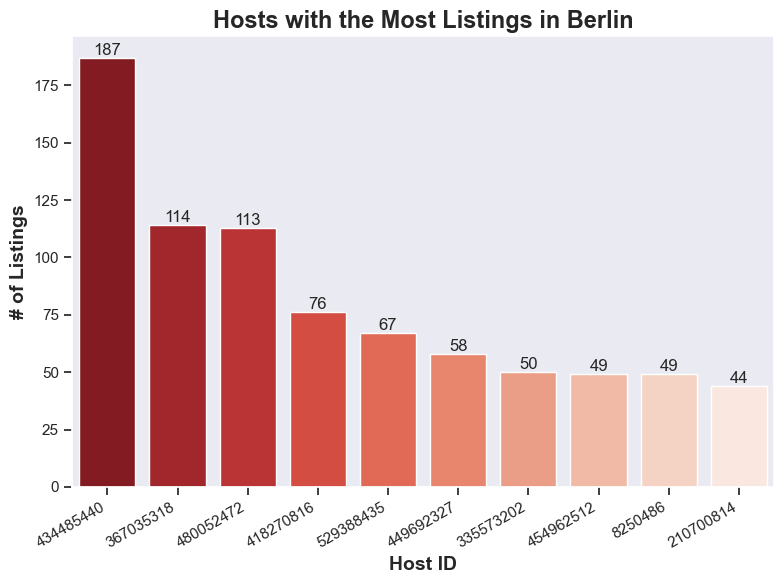

In [72]:
# Visualization

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Host_ID', y = '# of Listings',
                data = top_10_host_df,
                palette='Reds_r',
                ax=ax,
                order=top_10_host_df.sort_values('# of Listings', ascending=False).Host_ID)

# Set up labels
plt.xlabel('Host ID', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('# of Listings', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Hosts with the Most Listings in Berlin', fontsize=17, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


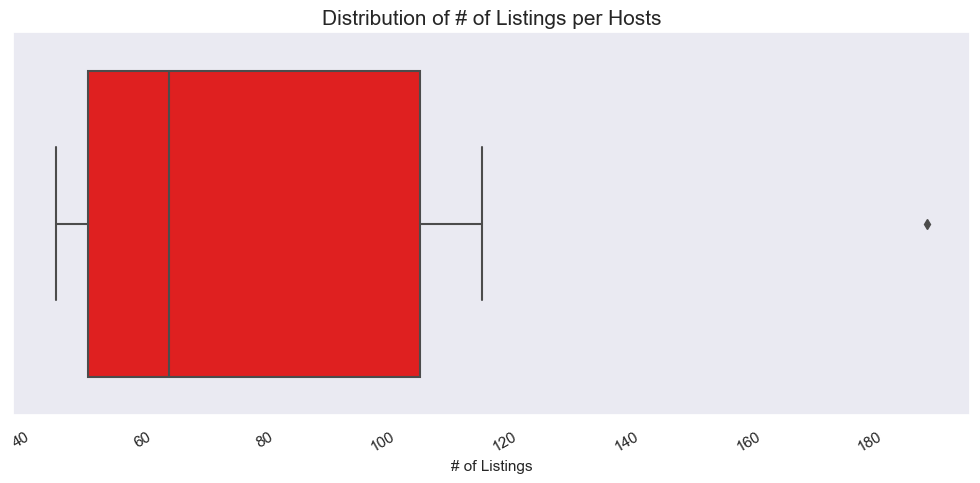

In [73]:
# Let's create a box plot of the data to see the distribution of the data. 

# Setting up figure settings
fig_dims = (10,5)

# Create the boxplot graph
f, (ax) = plt.subplots(figsize=fig_dims)
sns.boxplot(top_10_host_df['# of Listings'], color = 'red')

# Labels 
plt.xlabel('# of Listings', fontsize = 11)
plt.title('Distribution of # of Listings per Hosts', fontsize = 15)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()


In [74]:
# Check the distribution of # of the number of listings from all the listings, not just the top 10
berlin_host_df.describe()

,Host_ID,# of Listings
count,9.220000e+03,9220.000000
mean,1.123847e+08,1.424512
std,1.430975e+08,3.339529
min,1.581000e+03,1.000000
25%,1.231030e+07,1.000000
50%,4.345932e+07,1.000000
75%,1.590730e+08,1.000000
max,5.369634e+08,187.000000


<font color=FA5252>

#### **Analysis #1:**
- We see that the host **'434485440'** has the most Airbnb listing in Germany with 187 listings.
- In our top 10 data, we see that it is a big outlier in comparison to the other top 10 listings.
- However, we don't see the extent of this until we see the data descriptive statistics of the full data.
    - A majority of hosts only have 1 listings, so we see how significant of an outlier 187 listings is. 
    - In comparison to the full data, we see how significant of an outlier the top 10 hosts with the most listings are.

#### **Further analysis from this data:**
- We saw the different room types each listings has. 
- We can predict that the top 10 hosts with the most listings will likely have a combination of room types for their listings as:
    - It is less likely that a host own 187 houses/apartments, but this is a theory. 

##### **We will be analyzing the composition of room types that the top 10 hosts has.**

</font>

<font color=D9768B>

### **Analysis #2: How does Airbnb prices compare in the different neighbourhood group? Is there one or a couple of neighbourhood groups that are more expensive than others?**

</font>

In [75]:
# Let's select our columns of interest
    ## Neighbourhood group and prices

selected_columns = ['neighbourhood_group_cleansed', 'price']

# Assign it a new dataframe that we will use specifically for this analysis
subset_ngroup_df = berlin_df[selected_columns]
subset_ngroup_df

,neighbourhood_group_cleansed,price
0,Pankow,83.0
1,Pankow,180.0
2,Pankow,70.0
3,Friedrichshain-Kreuzberg,90.0
4,Neukölln,25.0
...,...,...
13129,Mitte,100.0
13130,Pankow,90.0
13131,Mitte,95.0
13132,Friedrichshain-Kreuzberg,130.0


In [76]:
# Let's get the statistical data for each neighbourhood group.
summary_table = subset_ngroup_df.groupby('neighbourhood_group_cleansed')['price'].describe()
summary_table

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Charlottenburg-Wilm.,1209.0,122.036394,101.638678,10.0,57.00,94.0,155.00,999.0
Friedrichshain-Kreuzberg,2871.0,114.820620,123.457850,8.0,50.00,84.0,142.00,2500.0
Lichtenberg,345.0,96.660870,91.595949,10.0,45.00,70.0,120.00,950.0
Marzahn - Hellersdorf,106.0,782.839623,4152.787782,12.0,39.25,65.0,107.25,24999.0
Mitte,2833.0,139.813272,139.534213,10.0,56.00,100.0,185.00,2310.0
Neukölln,1555.0,83.893891,73.781877,9.0,40.00,65.0,100.00,999.0
Pankow,2058.0,118.009232,99.848546,9.0,59.00,90.0,150.00,1800.0
Reinickendorf,202.0,75.470297,52.743551,10.0,45.00,59.5,98.75,443.0
Spandau,207.0,61.367150,72.463988,10.0,12.00,30.0,82.50,439.0


In [77]:
# Let's just select the 50% tile 
medians = subset_ngroup_df.groupby('neighbourhood_group_cleansed')['price'].median()

# Compute the mean of the medians
average_of_medians = medians.mean()
average_of_medians

74.5

<font color=D9768B>

- We see that the median price of the Airbnb listings for each neighbourhood group are very close to each other. We calculated the average of the 50% tile and got **$74.50**. This could be considered as the average price for an Airbnb listing in Berlin. We see that the neighbourhood group **Spandau** has a significantly lower lisitng prices per night.

- We also see that some of the neighbourhood groups contain listings that are considered to be a significant outlier.
    - **Marzahn - Hellersdorf**  - $2,499.00
    - **Steglitz - Zehlendorf** - $10,000.00

    - We can see how these listings have affected our mean price for each group and it also tells us that the mean is not the best data to analyze how prices from each groups compare to each other. 
    - In this case, the median is the better measure to analyze our data, because it is unaffected by extreme outliers or non-symmetric distributions of scores.

- In order to visualize this, we will create a violin plot to show the distribution of prices per group.
    - We will ignore the outliers and highlight the price closer to the median to see how the median compares with each group.
    - We will be using a violin plot instead od a box plot, because we want to see the density of our data.

</font>

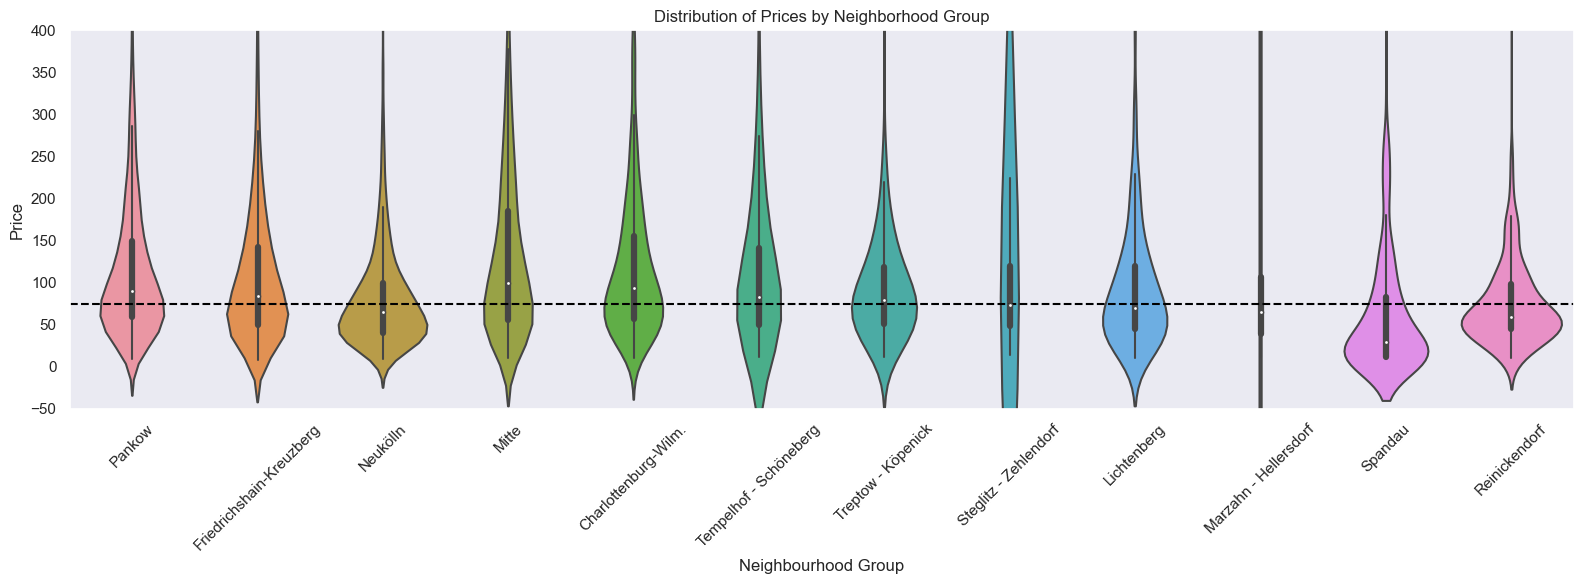

In [78]:

# Set up our figure size
sns.set(style="dark", font="sans serif")
plt.figure(figsize=(16, 6))  

# Create our plot
sns.violinplot(x='neighbourhood_group_cleansed', y='price', data=subset_ngroup_df)

# Assign labels 
plt.title('Distribution of Prices by Neighborhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Assign our limits so outliers are not shown
plt.ylim(-50,400)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  

# Add a line to indicate the average price of an Airbnb listing
plt.axhline(y=74.5, color='black', linestyle='--', label=f'Median of')

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

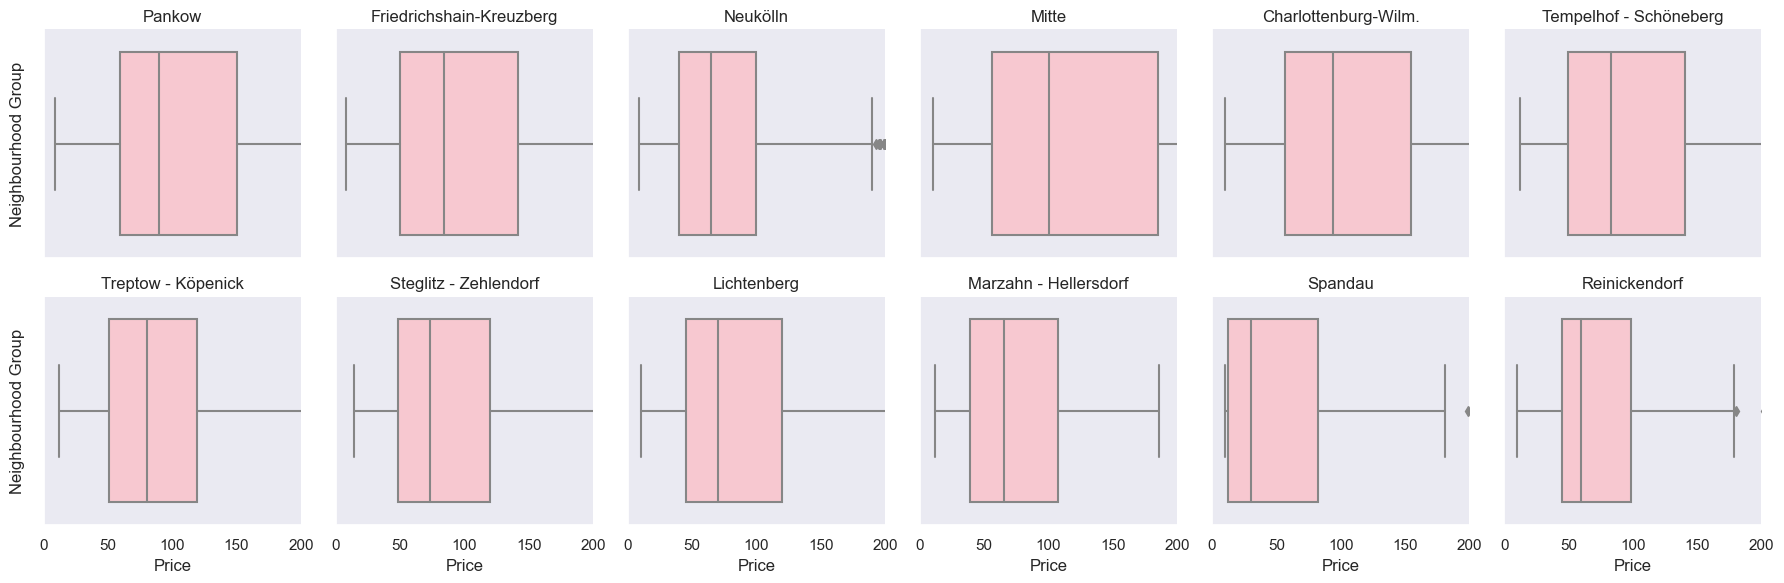

In [79]:
# Create a separate boxplot for each neighborhood group
g = sns.FacetGrid(subset_ngroup_df, col='neighbourhood_group_cleansed', col_wrap=6) 

# Create our graphs 
g.map_dataframe(sns.boxplot, x='price', color = 'pink')

# Add labels and limit to our graphs
g.set_axis_labels('Price', 'Neighbourhood Group')
g.set(xlim=(0, 200))
g.set_titles(col_template="{col_name}")

# Format our figure
plt.tight_layout()
plt.show()

<font color=D9768B>

#### **Analysis #2:** 

- With our statistical data and plots, we can see the distribution of prices for Airbnbs in each neighbourhood groups in Berlin. 
    - **Spandau** has the lowest range of prices for Airbnbs listings with $30.00 as the median price. **Reinickendorf** follows with $59.50. 
    - Overall, all of the neighbourhood group appears to have a very similar distribution with $74.50 as the average price. 
    - However, we did see very significant outliers for some neighbourhood groups, such as **Marzahn - Hellersdorf** with a maximum Airbnb listing of $2,499.00 and **Steglitz - Zehlendorf** with $10,000.00. 

</font>

<font color=B47CC2>


### **Analysis #3: How does room types affect prices?**

- We saw that the neighborhood did not greatly affect prices of Airbnb listings. 

</font>

In [80]:
# During our data exploration section, we already looked into the room type column
room_type_df

,Room_Type,# of Listings
0,Entire home/apt,8431
1,Private room,4309
2,Shared room,262
3,Hotel room,132


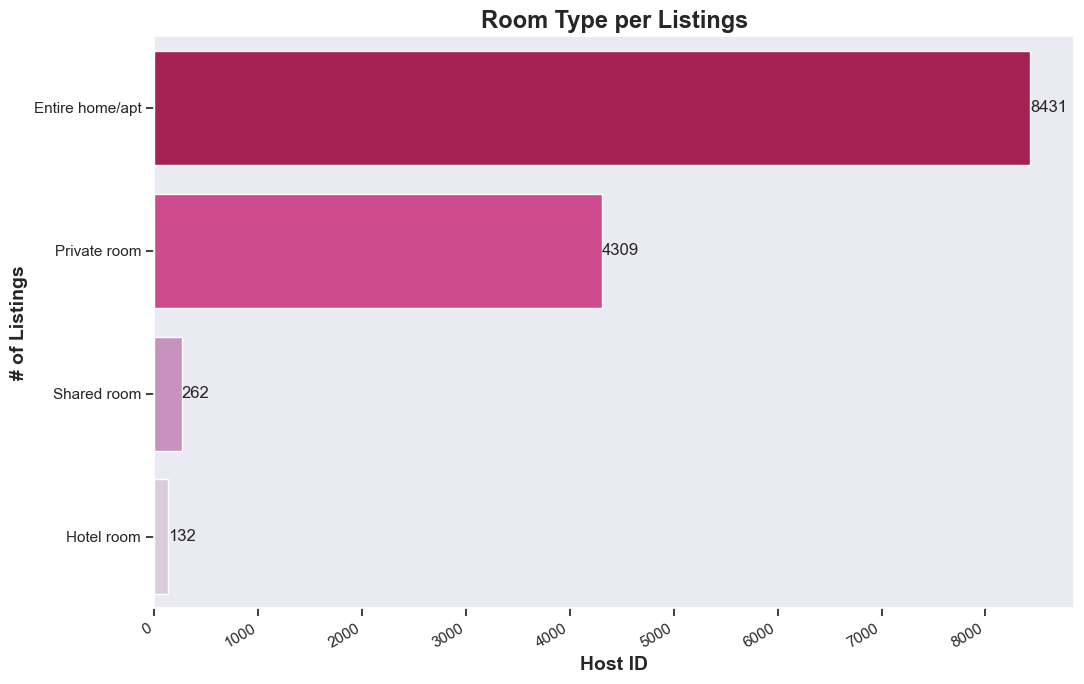

In [81]:
# Let's plot this to see the difference in the # of listings

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (11, 7)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(y = 'Room_Type', x = '# of Listings',
                data = room_type_df,
                palette='PuRd_r',
                ax=ax,
                order=room_type_df.sort_values('# of Listings', ascending=False).Room_Type)

# Set up labels
plt.xlabel('Host ID', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('# of Listings', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Room Type per Listings', fontsize=17, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

In [82]:
# Let's check out these two columns from our dataframe 
    ## room type
    ## price
# We can see how room types affect the prices
roomprice_df = berlin_df[['room_type', 'price']]
roomprice_df

,room_type,price
0,Entire home/apt,83.0
1,Entire home/apt,180.0
2,Entire home/apt,70.0
3,Entire home/apt,90.0
4,Entire home/apt,25.0
...,...,...
13129,Entire home/apt,100.0
13130,Entire home/apt,90.0
13131,Entire home/apt,95.0
13132,Entire home/apt,130.0


In [83]:
roomprice_stat = roomprice_df.groupby('room_type')['price'].describe()
roomprice_stat

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8431.0,137.916854,163.553476,10.0,70.00,105.0,165.00,10000.0
Hotel room,132.0,249.840909,111.176761,64.0,189.75,226.5,287.00,791.0
Private room,4309.0,90.189603,665.168602,8.0,32.00,50.0,77.00,24999.0
Shared room,262.0,62.206107,171.853841,9.0,12.00,19.5,53.75,2310.0


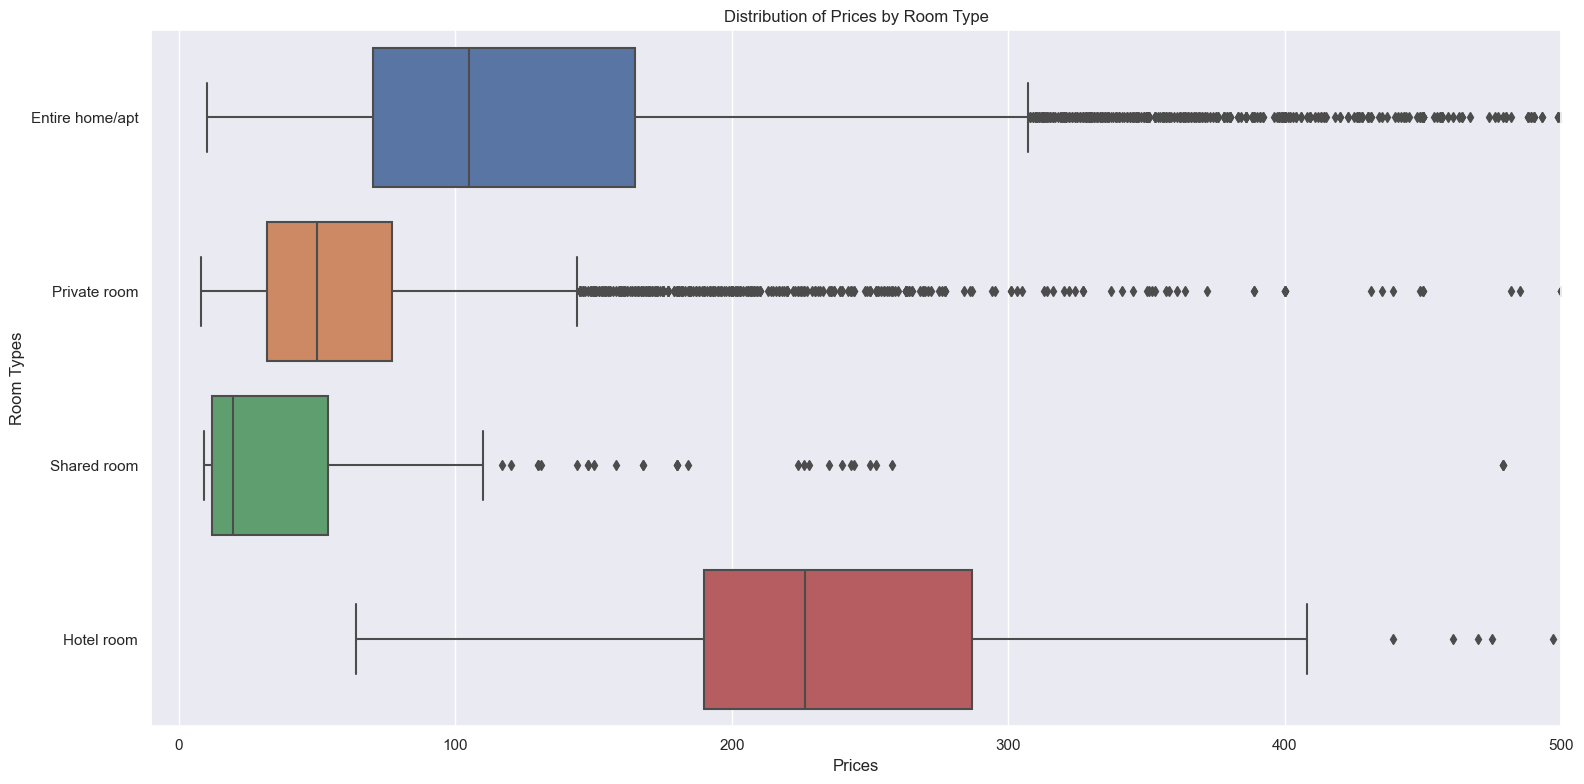

In [84]:
# Set up our figure size
sns.set(style="darkgrid", font="sans serif")
plt.figure(figsize=(16, 8))  

# Create our plot
sns.boxplot(x='price', 
            y='room_type', 
            data=roomprice_df)

# Assign labels 
plt.title('Distribution of Prices by Room Type')
plt.xlabel('Prices')
plt.ylabel('Room Types')

# Assign our limits so outliers are not shown
plt.xlim(-10,500)

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

<font color=B47CC2>

#### **Analysis #3:**

- There are significantly more listings that offers entire homes/apartments in Berlin.
    - Private rooms come in second while hotel room listings make up the least amount of listing which came in with only **132** listings.
- Then, we analyzed the prices per room type and see if there's any difference in the price distribution for each room type. 
    -From the statistical summary and box plot, we see that prices for hotel room are higher than the other room types
    - Shared room are the cheapest room type 
    - Prices for entire home/apts and private rooms varied the most with significant outliers.

**This is a good parameter to use to predict prices of Airbnbs**
</font>

<font color=8A83CE>

### **Analysis #4: Analyze the hosts' information

- We saw which hosts has the most listings, but did not go in depth with the analysis.
    - For this section, we will: 
        - **See if these information is a good parameter for our price and customer predictive analysis.**
        - What's the percentage of hosts are superhosts
        - See how many hosts have a rating of 4 and higher
        - Categorize them by their response time 

</font>

In [85]:
selected_columns = ['host_id','host_since','host_response_time','host_response_rate','host_acceptance_rate',
                'host_is_superhost','host_total_listings_count','host_has_profile_pic','host_identity_verified',
                'price','review_scores_rating', 'review_scores_value']

host_info_df = create_dataframe_with_default_values(berlin_df, selected_columns, default_value=0)
host_info_df

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,review_scores_rating,review_scores_value
0,3718,2008-10-19,0,0.0,30.0,f,1.0,t,t,83.0,4.63,4.62
1,33852,2009-08-25,0,0.0,0.0,f,1.0,t,t,180.0,5.00,4.86
2,55531,2009-11-18,within a few hours,86.0,29.0,f,5.0,t,t,70.0,4.67,4.42
3,64696,2009-12-20,within a day,100.0,50.0,f,4.0,t,t,90.0,4.72,4.71
4,68997,2010-01-08,within an hour,100.0,96.0,t,5.0,t,t,25.0,4.77,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...
13129,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,100.0,0.00,0.00
13130,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,90.0,0.00,0.00
13131,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,95.0,0.00,0.00
13132,332391440,2020-01-31,0,0.0,0.0,f,1.0,t,t,130.0,0.00,0.00


We know that there are not **13134** hosts.  
- Check our duplicates and check if it's not just the **host_id** column is duplicated but also their info on the other columns
- Create a new dataframe that only holds the unique host ids (no duplicates)

In [86]:
# Drop any duplicates in our dataframe 
host_info_df = host_info_df.drop_duplicates()
host_info_df

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,review_scores_rating,review_scores_value
0,3718,2008-10-19,0,0.0,30.0,f,1.0,t,t,83.0,4.63,4.62
1,33852,2009-08-25,0,0.0,0.0,f,1.0,t,t,180.0,5.00,4.86
2,55531,2009-11-18,within a few hours,86.0,29.0,f,5.0,t,t,70.0,4.67,4.42
3,64696,2009-12-20,within a day,100.0,50.0,f,4.0,t,t,90.0,4.72,4.71
4,68997,2010-01-08,within an hour,100.0,96.0,t,5.0,t,t,25.0,4.77,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...
13128,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,90.0,0.00,0.00
13129,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,100.0,0.00,0.00
13131,490320164,2022-12-05,within a few hours,88.0,73.0,f,16.0,t,t,95.0,0.00,0.00
13132,332391440,2020-01-31,0,0.0,0.0,f,1.0,t,t,130.0,0.00,0.00


We see that there were duplicates in our dataframe as our host id row changed from ~13000 to ~9000. 

In [87]:
# We see that there are columns that contains t or f values to indicate true or false. We want to convert them into booleans.
    # Convert all of the columns we need to convert 

convert_tf_to_boolean(host_info_df, 'host_has_profile_pic')
convert_tf_to_boolean(host_info_df, 'host_is_superhost')
convert_tf_to_boolean(host_info_df, 'host_identity_verified')

# print out dataframe
host_info_df


/Users/kim/Desktop/repos/1. Linear Regression/Airbnb_Berlin/Berlin_Airbnb_Function.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].apply(custom_function)


,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,review_scores_rating,review_scores_value
0,3718,2008-10-19,0,0.0,30.0,0,1.0,1,1,83.0,4.63,4.62
1,33852,2009-08-25,0,0.0,0.0,0,1.0,1,1,180.0,5.00,4.86
2,55531,2009-11-18,within a few hours,86.0,29.0,0,5.0,1,1,70.0,4.67,4.42
3,64696,2009-12-20,within a day,100.0,50.0,0,4.0,1,1,90.0,4.72,4.71
4,68997,2010-01-08,within an hour,100.0,96.0,1,5.0,1,1,25.0,4.77,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...
13128,490320164,2022-12-05,within a few hours,88.0,73.0,0,16.0,1,1,90.0,0.00,0.00
13129,490320164,2022-12-05,within a few hours,88.0,73.0,0,16.0,1,1,100.0,0.00,0.00
13131,490320164,2022-12-05,within a few hours,88.0,73.0,0,16.0,1,1,95.0,0.00,0.00
13132,332391440,2020-01-31,0,0.0,0.0,0,1.0,1,1,130.0,0.00,0.00


In [88]:
# Now, let's sort by the # of listings to see which neighbourhood has the highest number of Airbnb listings. 
top10_host_response = host_info_df.sort_values(['review_scores_rating','review_scores_value'], ascending = [False, False])

# Let's print out the 
top10_host_response = top10_host_response.head(20)
top10_host_response

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price,review_scores_rating,review_scores_value
21,218479,2010-08-31,0,0.0,0.0,0,1.0,1,1,169.0,5.0,5.0
103,1275359,2011-10-11,within a few hours,100.0,73.0,1,3.0,1,1,125.0,5.0,5.0
207,2480274,2012-05-28,0,0.0,0.0,0,3.0,1,1,101.0,5.0,5.0
222,2690936,2012-06-20,within a day,90.0,36.0,1,5.0,1,1,70.0,5.0,5.0
246,3144062,2012-08-03,within a few hours,100.0,100.0,0,3.0,1,1,75.0,5.0,5.0
248,3249789,2012-08-13,0,0.0,0.0,0,1.0,1,1,45.0,5.0,5.0
299,3305339,2012-08-19,0,0.0,20.0,0,1.0,1,1,40.0,5.0,5.0
311,4480544,2012-12-24,a few days or more,0.0,0.0,0,1.0,1,1,100.0,5.0,5.0
330,1332388,2011-10-25,within a day,100.0,50.0,1,2.0,1,1,56.0,5.0,5.0
355,5529699,2013-03-19,within a day,70.0,9.0,0,1.0,1,1,190.0,5.0,5.0


In [89]:
# Let's check the correlation of these column to price and customer ratiing 
    # These two are going to be part of our predictive analysis
price_corr = host_info_df.corrwith(host_info_df['price'])
price_corr = price_corr.sort_values(ascending=False)


review_corr = host_info_df.corrwith(host_info_df['review_scores_rating'])
review_corr = review_corr.sort_values(ascending=False)

print(price_corr)
print(review_corr)

price                        1.000000
host_acceptance_rate         0.106012
host_response_rate           0.066038
host_identity_verified       0.041653
host_id                      0.038542
host_total_listings_count    0.032437
host_is_superhost            0.029309
review_scores_rating         0.012318
review_scores_value          0.009408
host_has_profile_pic         0.003111
dtype: float64
review_scores_rating         1.000000
review_scores_value          0.989434
host_acceptance_rate         0.263088
host_is_superhost            0.212557
host_response_rate           0.184028
host_identity_verified       0.161206
host_has_profile_pic         0.112133
price                        0.012318
host_total_listings_count   -0.121255
host_id                     -0.143452
dtype: float64


In [90]:
# Let's check the count of superhost in Berlin 

    # Create a dictionary that shows the percentage of superhosts and those who are not 
superhost_dict = superhost_count(host_info_df, 'host_is_superhost')
column_names = ['Host_Is_Superhost','Percentage']

    # Turn it into a dataframe 
superhost_df = dict_to_df(superhost_dict, column_names)

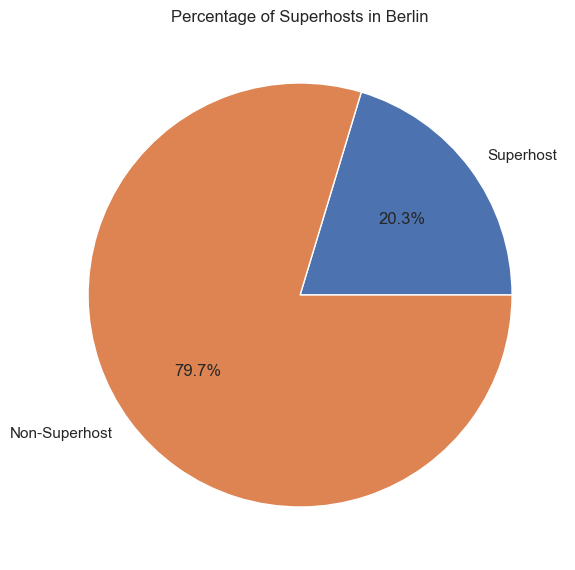

In [91]:
# Create a pie chart
# Set up figure
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))

#Create pie graph
plt.pie(superhost_df['Percentage'], labels=['Superhost', 'Non-Superhost'], autopct='%1.1f%%')

# Add in labels
plt.title('Percentage of Superhosts in Berlin', loc = 'center')

# Format graph
plt.tight_layout()
plt.show()

In [92]:
# Use the distribution function to get the count of for each bin 
rating_bins = [0,1,2,3,4,5]
rating_dict = get_rating_distribution(host_info_df, 'review_scores_rating', rating_bins)


# Turn it into a dataframe 
column_names = ['Ratings', '# of Hosts']
rating_dist_df = dict_to_df(rating_dict, column_names)
rating_dist_df

/Users/kim/Desktop/repos/1. Linear Regression/Airbnb_Berlin/Berlin_Airbnb_Function.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_group'] = pd.cut(df[rating_column], bins=bins, right=False, include_lowest=True)


,Ratings,# of Hosts
0,0-1,2441
1,1-2,27
2,2-3,24
3,3-4,198
4,4-5,7016


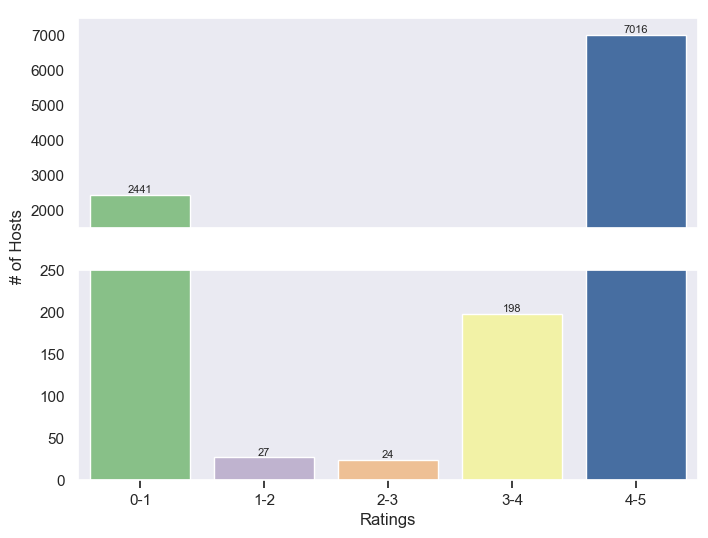

In [93]:
# Visualization

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph with two subplots 
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=fig_dims)

# Our two subplots will contain the same data 
ax1 = sns.barplot(x = 'Ratings', 
                  y = '# of Hosts',
                  data = rating_dist_df,
                  palette='Accent',
                  ax=ax1)

ax2 = sns.barplot(x = 'Ratings', 
                  y = '# of Hosts',
                  data = rating_dist_df,
                  palette='Accent',
                  ax=ax2)

# Set up our limits 
ax1.set_ylim(1500, 7500)
ax2.set_ylim(0, 250)


# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)

# by default, each part will get its own y-axis label, so remove the y label for both subplots
ax1.set_ylabel("")
ax2.set_ylabel("")

# Add in a y-axis label
f.text(0.04, 0.50, "# of Hosts", va="center", rotation="vertical")


# Add some ticks on the top of the upper part and bottom of the lower part for style
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.90) # Adjust plot to for aesthetics
for container in ax1.containers:
    ax1.bar_label(container, size = 8)

for container in ax2.containers:
    ax2.bar_label(container, size = 8)

plt.show()


In [94]:
# Categorize response time 

    # Count number of hosts in each category
response_time_count = Counter(host_info_df['host_response_time'])  

# Create our dataframe
column_names = ['Response_Times', '# of Hosts']
response_time_df = dict_to_df(response_time_count, column_names)

response_time_df['Response_Times'] = response_time_df['Response_Times'].replace(0, 'no data')
response_time_df

,Response_Times,# of Hosts
0,no data,4855
1,within a few hours,1451
2,within a day,1231
3,within an hour,4877
4,a few days or more,283


In [95]:
# # Our data is currently not in the order that we want. Let's change it
order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more', 'no data'] # The order we want them in

response_time_df['Response_Times'] = pd.Categorical(response_time_df.Response_Times, categories=order, ordered=True)
response_time_df=response_time_df.sort_values('Response_Times')
response_time_df

,Response_Times,# of Hosts
3,within an hour,4877
1,within a few hours,1451
2,within a day,1231
4,a few days or more,283
0,no data,4855


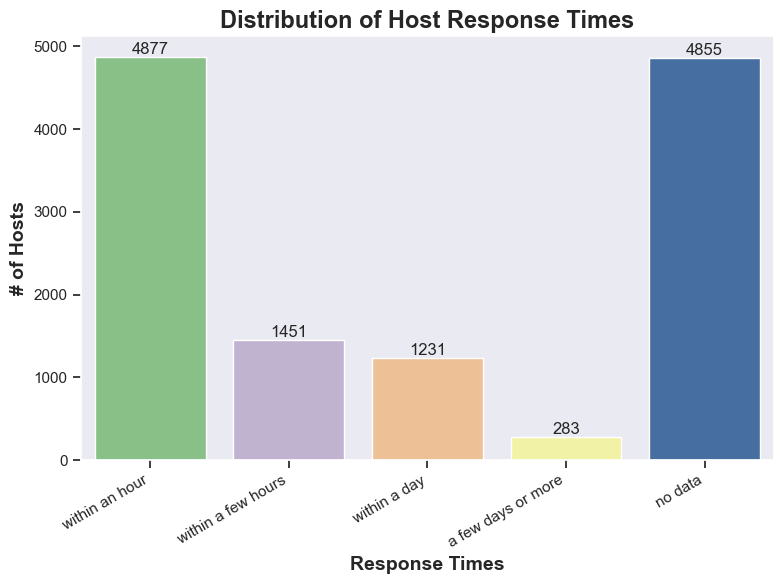

In [96]:

# Visualization

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Response_Times', y = '# of Hosts',
                data = response_time_df,
                palette='Accent',
                ax=ax)

# Set up labels
plt.xlabel('Response Times', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('# of Hosts', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Distribution of Host Response Times', fontsize=17, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

<font color=8A83CE>

#### **Analysis #4: 
- We analyzed information regarding to the hosts. 
    - We saw that there's not a positive correlation between hosts information and price of the listings. 
        - This makes sense as other factors such as room type, location, and amenities will greatly affected this more
    - There's also still not a significant positive correlation between the hosts information and customer review. 
    - My metric for this:
        - 0 - 0.3 = No significant correlation
        - 0.3 - 0.5 = Weak relation
        - 0.5 - 0.75 = Good relation
        - 0.75 - 1 = Stron relation
    - Only 1/5 of the hosts in Berlin are superhosts. 
    - A majority of the listings have a rating od 4-5 stars and roughly 20% of them doesn't have any kind of ratings yet. 
    - If we ignore the no data categrory for hosts' response time, we can say that about 75% of the hosts response within an hour.
        -If we don't ignore it, this goes down to ~35%
</font>